In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as io
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis as FA

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

In [2]:
data = io.loadmat('EEG_freq.mat')['EEG_freq']
freq_power = data['freq_power'][0][0]
event_marker = data['event_marker'][0][0].astype(int)
nTrials = len(event_marker)
# The dimension is 61 channels by 5 frequency by nTrials
print(freq_power.shape, event_marker.shape)

(61, 5, 256) (256,)


In [3]:
flatten_freq_power = []

for i in range(nTrials):
    flatten_freq_power.append(freq_power[:,:,i].flatten())
flatten_freq_power = np.array(flatten_freq_power)

<AxesSubplot: >

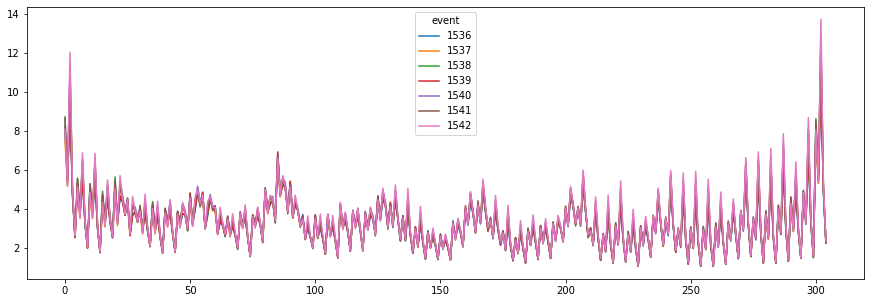

In [4]:
df=pd.DataFrame(flatten_freq_power)
df['event']=event_marker
df.groupby('event').mean().T.plot(figsize=(15,5))

# without PCA

In [5]:
rd=333
X=flatten_freq_power
y=event_marker
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rd)

## KNN

uniform 3 0.21875
distance 9 0.21875


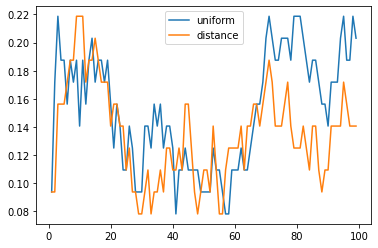

0.1875


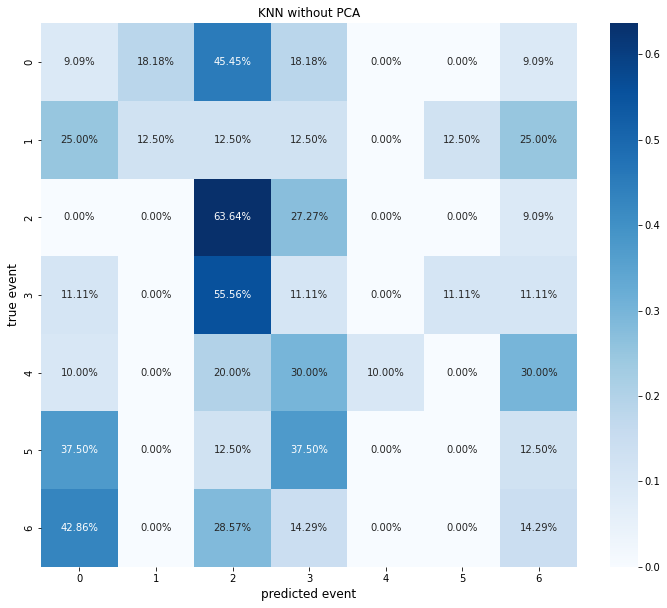

In [6]:
## KNN without PCA

# # gridsearch
# k_range = list(range(1,50))
# param_grid = dict(n_neighbors = k_range, weights = ["distance"])
# knn = KNeighborsClassifier()
# grid_dis = GridSearchCV(knn, param_grid, cv = 4, scoring = 'accuracy')
# grid_dis.fit(X,y)
# print (grid_dis.best_score_,grid_dis.best_params_)

# param_grid = dict(n_neighbors = k_range, weights = ["uniform"])
# grid_uni = GridSearchCV(knn, param_grid, cv = 4, scoring = 'accuracy')
# grid_uni.fit(X,y)
# print (grid_uni.best_score_,grid_uni.best_params_)
# # grid.cv_results_
# plt.plot(k_range,grid_dis.cv_results_['mean_test_score'],label="distance")
# plt.plot(k_range,grid_uni.cv_results_['mean_test_score'],label="uniform")
# plt.legend()
# plt.show()

# KNN

klist=list(range(1,100,1))
acc_uni=list()
for k in klist:
    clf_uni = KNeighborsClassifier(n_neighbors=k,weights = "uniform")
    clf_uni.fit(X_train, y_train)
    y_predict = clf_uni.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    acc_uni.append(accuracy_score(y_test, y_predict))


acc_dis=list()
for k in klist:
    clf_dis = KNeighborsClassifier(n_neighbors=k,weights = "distance")
    clf_dis.fit(X_train, y_train)
    y_predict = clf_dis.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    acc_dis.append(accuracy_score(y_test, y_predict))

plt.plot(klist,acc_uni,label='uniform')
plt.plot(klist,acc_dis,label='distance')
plt.legend()
print("uniform",klist[acc_uni.index(max(acc_uni))],max(acc_uni))
print("distance",klist[acc_dis.index(max(acc_dis))],max(acc_dis))
plt.show()
# KNN

clf = KNeighborsClassifier(n_neighbors=74,weights = "uniform")
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('predicted event', fontsize = 12) 
plt.ylabel('true event', fontsize = 12) 
plt.title('KNN without PCA')
plt.show()

## SVM

0.15625
0.234375
0.25


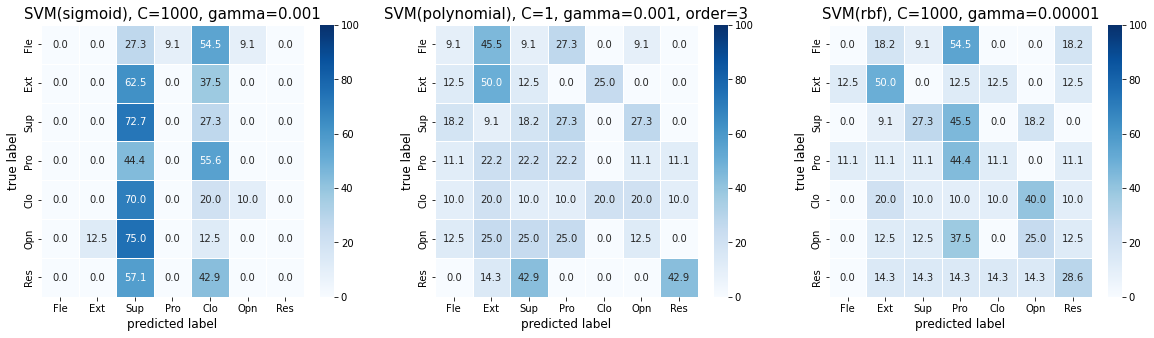

In [7]:
svm = SVC(kernel = 'sigmoid', gamma=0.001,C=1000,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_1 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))

svm = SVC(kernel = 'poly', gamma=1e-3,C=1,degree=3,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_2 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))

svm = SVC(kernel = 'rbf', gamma=0.00001,C=1000,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_3 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))



cm_1 = 100 * cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
cm_2 = 100 * cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]
cm_3 = 100 * cm_3.astype('float') / cm_3.sum(axis=1)[:, np.newaxis]
target_names=['Fle','Ext','Sup','Pro','Clo','Opn','Res']
df_1 = pd.DataFrame(data=cm_1, columns=target_names, index=target_names)
df_2 = pd.DataFrame(data=cm_2, columns=target_names, index=target_names)
df_3 = pd.DataFrame(data=cm_3, columns=target_names, index=target_names)


plt.figure(figsize=(20,5))

plt.subplot(131)
sns.heatmap(df_1, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12)  
plt.title('SVM(sigmoid), C=1000, gamma=0.001', fontsize = 15)

plt.subplot(132)
sns.heatmap(df_2, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12) 
plt.title('SVM(polynomial), C=1, gamma=0.001, order=3', fontsize = 15)

plt.subplot(133)
sns.heatmap(df_3, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12) 
plt.title('SVM(rbf), C=1000, gamma=0.00001', fontsize = 15)
plt.show()

# with PCA

The first 11 eigenvectors preserves the 95% variance


Text(0.5, 0.98, 'scree plot')

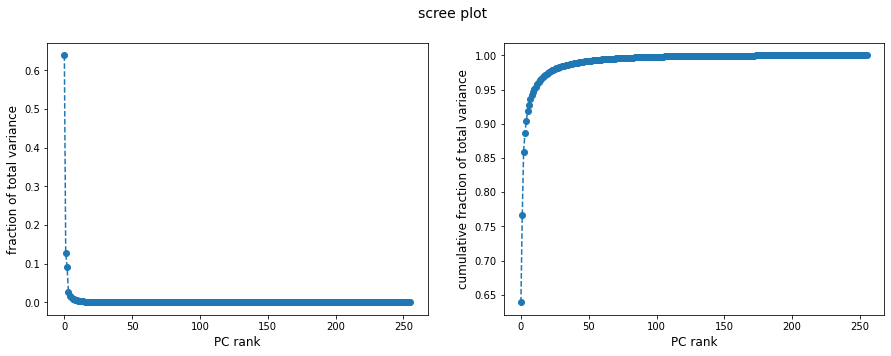

In [8]:
pca = PCA()
pca.fit(X)
eigenvalues = pca.explained_variance_
acc_percentage = 0;
percentage = eigenvalues/np.sum(eigenvalues)
for i in range(len(eigenvalues)):
    acc_percentage += percentage[i]
    if acc_percentage > 0.95:
        nEigenvalues = i;
        break;
        
print('The first %d eigenvectors preserves the 95%% variance' %(nEigenvalues+1))
cumu = np.cumsum(percentage)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(percentage, linestyle='--', marker='o')
plt.xlabel('PC rank', fontsize = 12)
plt.ylabel('fraction of total variance', fontsize = 12)
plt.subplot(122)
plt.plot(cumu, linestyle='--', marker='o')
plt.xlabel('PC rank', fontsize = 12)
plt.ylabel('cumulative fraction of total variance', fontsize = 12)

plt.suptitle('scree plot', fontsize = 14)

In [9]:
pca = PCA(n_components=nEigenvalues+1)
pca.fit(X)
X_PCA = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.25, random_state=rd)

## KNN

uniform 80 0.234375
distance 8 0.21875


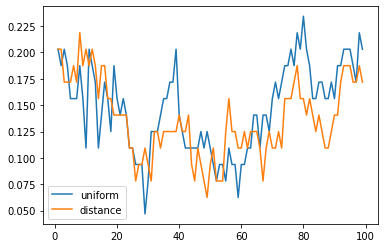

0.1875


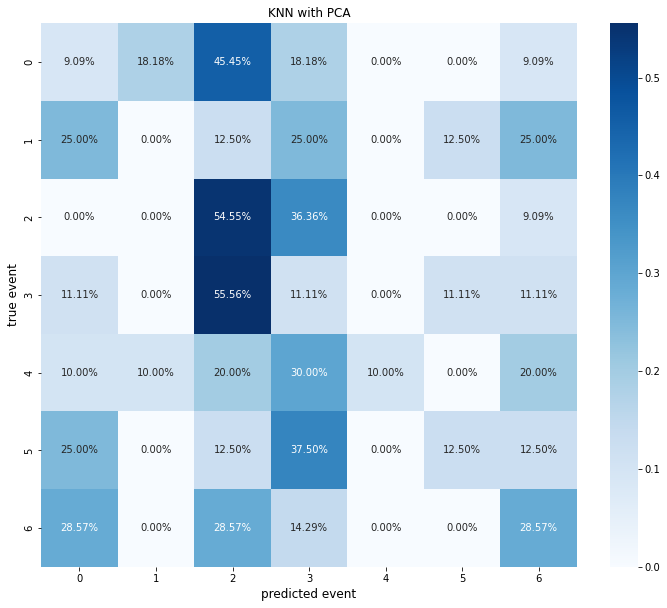

In [10]:
## KNN with PCA

klist=list(range(1,100,1))
acc_uni=list()
for k in klist:
    clf_uni = KNeighborsClassifier(n_neighbors=k,weights = "uniform")
    clf_uni.fit(X_train, y_train)
    y_predict = clf_uni.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    acc_uni.append(accuracy_score(y_test, y_predict))


acc_dis=list()
for k in klist:
    clf_dis = KNeighborsClassifier(n_neighbors=k,weights = "distance")
    clf_dis.fit(X_train, y_train)
    y_predict = clf_dis.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    acc_dis.append(accuracy_score(y_test, y_predict))

plt.plot(klist,acc_uni,label='uniform')
plt.plot(klist,acc_dis,label='distance')
plt.legend()
print("uniform",klist[acc_uni.index(max(acc_uni))],max(acc_uni))
print("distance",klist[acc_dis.index(max(acc_dis))],max(acc_dis))
plt.show()
# KNN
clf = KNeighborsClassifier(n_neighbors=74,weights = "uniform")
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))


plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('predicted event', fontsize = 12) 
plt.ylabel('true event', fontsize = 12) 
plt.title('KNN with PCA')
plt.show()

## SVM

0.234375
0.125
0.265625


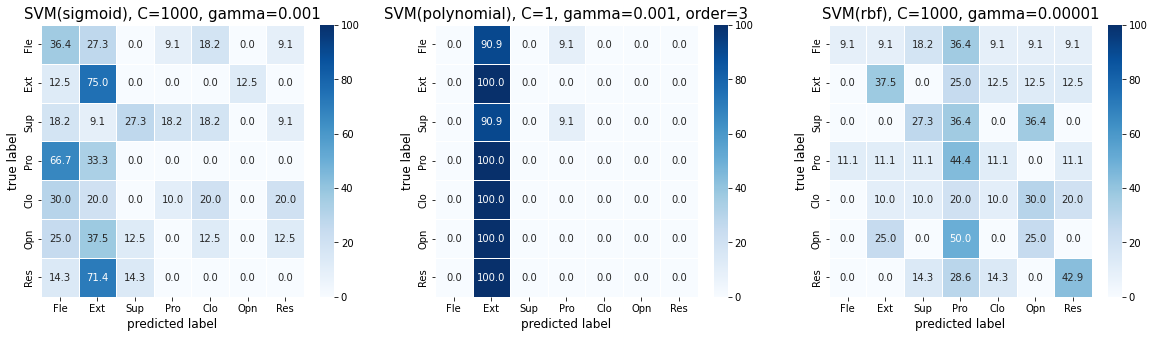

In [11]:
svm = SVC(kernel = 'sigmoid', gamma=0.001,C=1000,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_1 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))

svm = SVC(kernel = 'poly', gamma=1e-3,C=1,degree=3,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_2 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))

svm = SVC(kernel = 'rbf', gamma=0.00001,C=1000,random_state = rd)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
cm_3 = confusion_matrix(y_test, y_predict,normalize='true')
print(accuracy_score(y_test, y_predict))



cm_1 = 100 * cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
cm_2 = 100 * cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]
cm_3 = 100 * cm_3.astype('float') / cm_3.sum(axis=1)[:, np.newaxis]
target_names=['Fle','Ext','Sup','Pro','Clo','Opn','Res']
df_1 = pd.DataFrame(data=cm_1, columns=target_names, index=target_names)
df_2 = pd.DataFrame(data=cm_2, columns=target_names, index=target_names)
df_3 = pd.DataFrame(data=cm_3, columns=target_names, index=target_names)


plt.figure(figsize=(20,5))

plt.subplot(131)
sns.heatmap(df_1, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12)  
plt.title('SVM(sigmoid), C=1000, gamma=0.001', fontsize = 15)

plt.subplot(132)
sns.heatmap(df_2, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12) 
plt.title('SVM(polynomial), C=1, gamma=0.001, order=3', fontsize = 15)

plt.subplot(133)
sns.heatmap(df_3, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,cmap='Blues')
plt.xlabel('predicted label', fontsize = 12) 
plt.ylabel('true label', fontsize = 12) 
plt.title('SVM(rbf), C=1000, gamma=0.00001', fontsize = 15)
plt.show()